In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
df = pd.read_csv('survey lung cancer.csv')

In [31]:
def preprocess_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df['GENDER'] = df['GENDER'].map({'Male': 'M', 'Female': 'F'})

    df.columns = df.columns.str.strip()

    return df

In [32]:
df = preprocess_data(df)

In [33]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X = pd.get_dummies(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8928571428571429


In [37]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.50      0.67        12
         YES       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



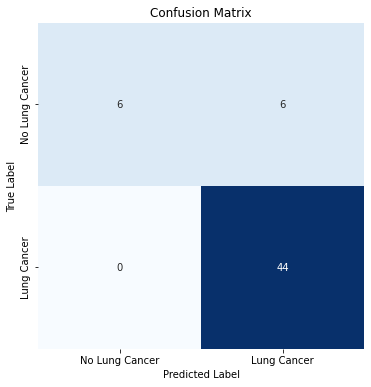

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
def get_input_from_user():
    print("Please provide the following information:")
    gender = input("Gender (M/F): ").upper()
    age = int(input("Age: "))
    smoking = int(input("Smoking status (1 - No, 2 - Yes): "))
    yellow_fingers = int(input("Yellow fingers (1 - No, 2 - Yes): "))
    anxiety = int(input("Anxiety (1 - No, 2 - Yes): "))
    peer_pressure = int(input("Peer pressure (1 - No, 2 - Yes): "))
    chronic_disease = int(input("Chronic disease (1 - No, 2 - Yes): "))
    fatigue = int(input("Fatigue (1 - No, 2 - Yes): "))
    allergy = int(input("Allergy (1 - No, 2 - Yes): "))
    wheezing = int(input("Wheezing (1 - No, 2 - Yes): "))
    alcohol_consuming = int(input("Alcohol consuming (1 - No, 2 - Yes): "))
    coughing = int(input("Coughing (1 - No, 2 - Yes): "))
    shortness_of_breath = int(input("Shortness of breath (1 - No, 2 - Yes): "))
    swallowing_difficulty = int(input("Swallowing difficulty (1 - No, 2 - Yes): "))
    chest_pain = int(input("Chest pain (1 - No, 2 - Yes): "))

    user_data = {
        'AGE': [age],
        'GENDER': [gender],
        'SMOKING': [smoking],
        'YELLOW_FINGERS': [yellow_fingers],
        'ANXIETY': [anxiety],
        'PEER_PRESSURE': [peer_pressure],
        'CHRONIC DISEASE': [chronic_disease],
        'FATIGUE': [fatigue],
        'ALLERGY': [allergy],
        'WHEEZING': [wheezing],
        'ALCOHOL CONSUMING': [alcohol_consuming],
        'COUGHING': [coughing],
        'SHORTNESS OF BREATH': [shortness_of_breath],
        'SWALLOWING DIFFICULTY': [swallowing_difficulty],
        'CHEST PAIN': [chest_pain]
    }
    return user_data


In [40]:
def predict_lung_cancer(user_data):
    user_data_df = pd.DataFrame.from_dict(user_data)
    user_data_df = user_data_df[X.columns]  # Reorder columns to match model's expectations
    prediction = model.predict(user_data_df)
    return prediction[0]

In [41]:
def interpret_prediction(prediction):
    if prediction == 'NO':
        return "No lung cancer detected."
    else:
        return "Lung cancer detected. Please consult a doctor for further evaluation."

In [43]:
if __name__ == "__main__":
    while True:
        user_input = get_input_from_user()
        
        prediction_result = predict_lung_cancer(user_input)
        
        result_message = interpret_prediction(prediction_result)
        print(result_message)
        
        repeat = input("Do you want to test again? (yes/no): ").lower()
        if repeat != "yes":
            break

Please provide the following information:
Gender (M/F): F
Age: 23
Smoking status (1 - No, 2 - Yes): 1
Yellow fingers (1 - No, 2 - Yes): 1
Anxiety (1 - No, 2 - Yes): 1
Peer pressure (1 - No, 2 - Yes): 1
Chronic disease (1 - No, 2 - Yes): 1
Fatigue (1 - No, 2 - Yes): 1
Allergy (1 - No, 2 - Yes): 1
Wheezing (1 - No, 2 - Yes): 1
Alcohol consuming (1 - No, 2 - Yes): 1
Coughing (1 - No, 2 - Yes): 1
Shortness of breath (1 - No, 2 - Yes): 1
Swallowing difficulty (1 - No, 2 - Yes): 1
Chest pain (1 - No, 2 - Yes): 1
No lung cancer detected.
Do you want to test again? (yes/no): no
